# **Useful Links:**

[Ego4D Docs - Start Here!](https://ego4d-data.org/docs/start-here/#Download-The-CLI)

[Data Overview](https://ego4d-data.org/docs/data-overview/)

[Official Ego4D Site](https://ego4d-data.org/)

# Setup

In [22]:
# Set your options here
CLI_OUTPUT_DIR = "~/ego4d_data" # Replace with the full path to the --output_directory you pass to the cli
CLI_OUTPUT_DIR = "/Users/dkukreja/ego4d_data/"
VERSION = "v1"
# Assumes videos are already downloaded to the <version>/full_scale/ folder using the cli
# Assumes manifest.csv is in the root directory (can be in <version>/full_scale/)

In [2]:
# Setup 
import collections
import csv
import json
import logging
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import random
from itertools import groupby
from pprint import pprint
from iopath.common.file_io import PathManager

%matplotlib inline

pathmgr = PathManager()

def vid_df_des(df):
    return f"#{len(df)} {df.duration_sec.sum()/60/60:.1f}h"
def vid_des(videos):
    return f"#{len(videos)} {sum((x.duration_sec for x in videos))/60/60:.1f}h"
def deserialize_str_list(list_: str):
    list_ = list_[1:-2]
    items = list_.split("', '")
    return list(map(lambda z: z.strip("'"), items))
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

# Video API

In [3]:
videos_df = pd.read_csv(os.path.join(CLI_OUTPUT_DIR, VERSION, 'manifest.csv'))
videos_df['scenarios'] = videos_df['scenarios'].apply(deserialize_str_list)
def get_video(video_uid):
    return videos_df.loc[videos_df['video_uid'] == '353ae622-c322-443e-95b4-e9927dedfa1c'].iloc[0]
print(f"R1 Videos: {vid_df_des(videos_df)}")

R1 Videos: #9060 3600.1h


In [4]:
# Sample one video for a metadata example
video = videos_df.sample(1).iloc[0]
pprint(video)

video_uid                                        e18a43a4-1e7b-4478-bc7f-16cb55a8ac16
origin_video_id                                               subject00002_video02006
video_source                                                                minnesota
duration_sec                                                                  1090.97
scenarios                                                     [Walking the dog / pet]
device                                                                         Zshade
deid_scrubbed_audio                                                             False
deid_scrubbed_faces                                                             False
physical_setting_name                                                             NaN
fb_participant_id                                                               137.0
fps                                                                              30.0
display_resolution_width                              

In [5]:
# TODO: Dataset stats, data types, redacted examples
videos_df.describe()

,duration_sec,fb_participant_id,fps,display_resolution_width,display_resolution_height,sample_resolution_width,sample_resolution_height,canonical_fps,canonical_display_width,canonical_display_height,...,canonical_audio_duration_sec,canonical_video_start_pts,canonical_video_duration_pts,canonical_video_base_numerator,canonical_video_base_denominator,canonical_audio_start_pts,canonical_audio_duration_pts,canonical_audio_base_numerator,canonical_audio_base_denominator,canonical_audio_channel_rate_hz
count,9060.000000,7580.000000,8780.000000,9037.000000,9037.000000,9042.000000,9037.000000,9060.0,9060.000000,9060.000000,...,5474.000000,9060.000000,9.060000e+03,9060.0,9060.0,5474.0,5.474000e+03,5474.0,5474.000000,5474.000000
mean,1430.523134,314.636544,35.931824,1867.038730,1303.096160,1701.994028,1303.096160,30.0,1868.232781,1304.728477,...,1549.808750,210.170199,2.196915e+07,1.0,15360.0,0.0,7.169222e+07,1.0,45629.320424,45629.320424
std,1641.564917,222.262224,12.550025,396.118796,347.653898,287.474082,347.653898,0.0,396.919716,349.153903,...,1594.529966,176.389281,2.520810e+07,0.0,0.0,0.0,7.686897e+07,0.0,5662.738536,5662.738536
min,5.000000,8.000000,13.955089,810.000000,720.000000,810.000000,720.000000,30.0,810.000000,720.000000,...,5.440000,0.000000,7.680000e+04,1.0,15360.0,0.0,1.740800e+05,1.0,32000.000000,32000.000000
25%,449.890000,132.000000,30.000000,1440.000000,1080.000000,1440.000000,1080.000000,30.0,1440.000000,1080.000000,...,537.976750,0.000000,6.910336e+06,1.0,15360.0,0.0,2.474955e+07,1.0,48000.000000,48000.000000
50%,1048.675000,291.000000,30.000000,1920.000000,1080.000000,1920.000000,1080.000000,30.0,1920.000000,1080.000000,...,1229.080000,323.000000,1.610752e+07,1.0,15360.0,0.0,5.258252e+07,1.0,48000.000000,48000.000000
75%,1800.130000,456.000000,50.000000,1920.000000,1440.000000,1920.000000,1440.000000,30.0,1920.000000,1440.000000,...,1860.820000,323.000000,2.765005e+07,1.0,15360.0,0.0,8.833266e+07,1.0,48000.000000,48000.000000
max,25417.680000,866.000000,60.000000,5760.000000,2880.000000,2880.000000,2880.000000,30.0,5760.000000,2880.000000,...,25417.600000,492.000000,3.904143e+08,1.0,15360.0,0.0,1.220046e+09,1.0,48000.000000,48000.000000


In [6]:
# Scenarios
to_1D(videos_df['scenarios']).value_counts()

Cooking                                                                                                            1281
Crafting/knitting/sewing/drawing/painting                                                                          1183
Cleaning / laundry                                                                                                  996
jobs related to construction/renovation company\n(Director of work, tiler, plumber, Electrician, Handyman, etc)     888
                                                                                                                    720
                                                                                                                   ... 
Cleaning at the gym                                                                                                   1
writing on book                                                                                                       1
Frisbee                                 

# Narrations

In [7]:
# Load narrations
with pathmgr.open(os.path.join(CLI_OUTPUT_DIR, VERSION, 'annotations', 'narration.json'), "r") as f:
    ego4d_annotations = json.load(f)

In [8]:
# Sample one video for annotation examples
vanns = None
while not vanns:
    video = videos_df.sample().iloc[0]
    vanns = ego4d_annotations.get(video.video_uid)['narration_pass_1']

first_ann = next(iter(vanns))
print(f"Narration Keys: {first_ann.keys()}")

print(f"Narration Annotations ({len(vanns)}): {video.video_uid}")
for ann in vanns[0:5]:
    print(f"{ann['timestamp_sec']:.1f}\t: {ann['narration_text']}")

Narration Keys: dict_keys(['timestamp_sec', 'narration_text'])
Narration Annotations (420): 4d76c2c7-c6a2-46a6-bc94-0033c629f040
0.7	: #C C looks at the car mirror
5.0	: #C C walks around
23.5	: #O man X walks around
24.9	: #C C walks around
36.8	: #C C throws the gumboots


# Episodic Memory (Moments/NLQ/VQ)

In [9]:
# Episodic Memory (Moments/NLQ/VQ) Annotations
with pathmgr.open(os.path.join(CLI_OUTPUT_DIR, VERSION, 'annotations', 'nlq.json'), "r") as f:
    nlq_annotations = json.load(f)
    nlq_ann_video_uids = [x["video_uid"] for x in nlq_annotations["videos"]]
with pathmgr.open(os.path.join(CLI_OUTPUT_DIR, VERSION, 'annotations', 'vq.json'), "r") as f:
    vq_annotations = json.load(f)
    vq_ann_video_uids = [x["video_uid"] for x in vq_annotations["videos"]]
with pathmgr.open(os.path.join(CLI_OUTPUT_DIR, VERSION, 'annotations', 'moments.json'), "r") as f:
    moments_annotations = json.load(f)
    moments_ann_video_uids = [x["video_uid"] for x in moments_annotations["videos"]]

In [10]:
nlq_video_dict = {x["video_uid"]: x["clips"] for x in nlq_annotations["videos"]}
vq_video_dict = {x["video_uid"]: x["clips"] for x in vq_annotations["videos"]}
moments_video_dict = {x["video_uid"]: x["clips"] for x in moments_annotations["videos"]}

In [11]:
common_video_uids = set(nlq_ann_video_uids).intersection(set(vq_ann_video_uids)).intersection(set(moments_ann_video_uids))
print(f"Moments: {len(moments_ann_video_uids)} NLQ Videos: {len(nlq_ann_video_uids)} VQ Videos: {len(vq_ann_video_uids)} Common: {len(common_video_uids)}")
video_uid = random.sample(common_video_uids, 1)[0]
video = get_video(video_uid)
print(f"Sampled Video: {video}")

Moments: 1596 NLQ Videos: 1261 VQ Videos: 2186 Common: 255
Sampled Video: video_uid                                        353ae622-c322-443e-95b4-e9927dedfa1c
origin_video_id                                          1293_007_020_001_010_144_002
video_source                                                                    iiith
duration_sec                                                                  5368.45
scenarios                           [jobs related to construction/renovation compa...
device                                                             GoPro Hero Black 7
deid_scrubbed_audio                                                              True
deid_scrubbed_faces                                                             False
physical_setting_name                                                             NaN
fb_participant_id                                                               813.0
fps                                                               

<ipython-input-11-9988a8041802>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  video_uid = random.sample(common_video_uids, 1)[0]


In [12]:
# Moments
ann_moments = moments_video_dict.get(video_uid)
print(f"Moments Video: {len(ann_moments)} clips: {video_uid}")
for clip in ann_moments[:1]:
    for cann in clip['annotations'][:1]:
        for label in cann['labels'][:3]:
            print(f"Label: {label['label']} \t{label['start_time']:.2f}-{label['end_time']:.2f}")

Moments Video: 1 clips: 5b18a6d6-2fa6-4ec8-8b3f-709ad79dcfae
Label: read_a_book_/_magazine_/_shopping_list_etc. 	42.79-52.10
Label: converse_/_interact_with_someone 	399.21-415.69


In [13]:
# NLQ
ann = nlq_video_dict.get(video_uid)
print(f"NLQ Video: {len(ann)} clips: {video_uid}")
print(f"language_queries keys: {ann[0]['annotations'][0]['language_queries'][0].keys()}\n")
for clip in ann[:1]:
    for cann in clip['annotations'][:1]:
        for query in cann['language_queries'][:3]:
            print(f"NLQ {query['start_sec']:.2f}-{query['end_sec']:.2f} ({query['slot_x']}, {query['verb_x']}) \ttemplate: {query['template']}\r\n"
                f"\tquery: {query['query']}") # TODO: change start_sec to video_start_sec

NLQ Video: 1 clips: 5b18a6d6-2fa6-4ec8-8b3f-709ad79dcfae
language_queries keys: dict_keys(['start_sec', 'end_sec', 'template', 'query', 'slot_x', 'verb_x', 'slot_y', 'verb_y', 'raw_tags'])

NLQ 47.58-47.58 (scott, [verb_not_applicable]) 	template: Objects: Where is object X before / after event Y?
	query: Where was scott tissue before I picked it?
NLQ 50.49-50.49 (word, [verb_not_applicable]) 	template: Objects: What X is Y?
	query: what word was written on the scott tissue nylon?
NLQ 62.25-62.25 (kleeney, [verb_not_applicable]) 	template: Objects: Where is object X before / after event Y?
	query: where was kleeney before i picked it?


In [14]:
# VQ
ann = vq_video_dict.get(video_uid)
print(f"VQ Video: {len(ann)} clips: {video_uid}")
print(f"clip: {ann[0].keys()}")
print(f"query set: {ann[0]['annotations'][0]['query_sets']['1'].keys()}\n")

for clip in ann[:3]:
    for cann in clip['annotations'][:1]:
        warnings = cann['warnings']
        if warnings and len(warnings) > 0:
            print(f"WARNING: {warnings}")
        for i, query_set in cann['query_sets'].items():
            query_frame = query_set['query_frame']
            object_title = query_set['object_title']
            print(f"\tquery_set({i}): query_frame: {query_frame} object_title: {object_title}")
            # response_track = query_set['response_track']
            visual_crop = query_set['visual_crop']
            print(f"\t\tvisual_crop: frame: {visual_crop['frame_number']} ({visual_crop['x']},{visual_crop['y']}) ({visual_crop['width']},{visual_crop['height']})")
            vq_visual_crop = {
                'frame': visual_crop["frame_number"],
                'x': visual_crop["x"],
                'y': visual_crop["y"],
                'width': visual_crop["width"],
                'height': visual_crop["height"],
                'label': object_title,
            }
            response_track = [] 
            for frame in query_set['response_track']:
                response_track.append({
                    'frame': frame["frame_number"],
                    'x': frame["x"],
                    'y': frame["y"],
                    'width': frame["width"],
                    'height': frame["height"],
                    'label': None,
                })

VQ Video: 2 clips: 5b18a6d6-2fa6-4ec8-8b3f-709ad79dcfae
clip: dict_keys(['clip_uid', 'clip_start_sec', 'clip_end_sec', 'clip_fps', 'annotation_complete', 'annotations'])
query set: dict_keys(['is_valid', 'errors', 'warnings', 'query_frame', 'response_track', 'object_title', 'visual_crop'])

	query_set(2): query_frame: 691 object_title: plastic wrap
		visual_crop: frame: 22 (319.56,240.5) (44.82,49.87)
	query_set(1): query_frame: 72 object_title: weighing scale
		visual_crop: frame: 680 (1560.53,771.16) (240.66,296.22)
	query_set(3): query_frame: 1073 object_title: stool
		visual_crop: frame: 694 (868.32,530.54) (241.51,465.11)
	query_set(3): query_frame: 922 object_title: cashier machine
		visual_crop: frame: 448 (754.76,315.48) (412.36,239.53)
	query_set(1): query_frame: 809 object_title: blue dustbin
		visual_crop: frame: 1134 (495.15,709.73) (202.38,345.77)
	query_set(2): query_frame: 1104 object_title: watch
		visual_crop: frame: 1275 (846.18,695.82) (76.7,60.59)


# FHO (Forecasting, Hands & Objects)

In [15]:
# FHO
with pathmgr.open(os.path.join(CLI_OUTPUT_DIR, VERSION, 'annotations', 'fho.json'), "r") as f:
    fho_annotations = json.load(f)
    fho_ann_video_uids = list(fho_annotations['video_data'].keys())
print(f"FHO: {len(fho_ann_video_uids)} videos - top level: {fho_annotations.keys()}")

FHO: 1088 videos - top level: dict_keys(['video_data', 'warning_descriptions', 'rejection_descriptions', 'state_changes', 'unmapped_nouns', 'unmapped_verbs', 'canonical_version'])


In [16]:
video_uid = random.sample(fho_ann_video_uids, 1)[0]
video = videos_df[videos_df.video_uid == video_uid].iloc[0]
print(f"Sampled Video: {video}")

Sampled Video: video_uid                                        891b4e61-3d8f-4854-9d59-7e5949b3af7b
origin_video_id                                          0312_007_085_001_004_043_002
video_source                                                                    iiith
duration_sec                                                                  2189.34
scenarios                                                                    [Farmer]
device                                                             GoPro Hero Black 7
deid_scrubbed_audio                                                              True
deid_scrubbed_faces                                                             False
physical_setting_name                                                             NaN
fb_participant_id                                                               131.0
fps                                                                              30.0
display_resolution_width               

In [17]:
vann = fho_annotations['video_data'].get(video_uid)
vann_video_metadata = vann['video_metadata']
ann_intervals = vann['annotated_intervals']
print(f"Video Intervals: {len(ann_intervals)} uid: {video_uid}")
print(f"Interval Keys: {ann_intervals[0].keys()}")
print(f"narrated_actions keys: {ann_intervals[0]['narrated_actions'][0].keys()}")
for interval in ann_intervals[:3]:
    actions = interval['narrated_actions']
    print(f"\ninterval [{interval['start_sec']:.2f}-{interval['end_sec']:.2f}] \tactions: {len(actions)}")
    # print(f"frame keys: {actions[0]['critical_frames'].keys()}")
    for action in actions[:5]:
        if action['is_invalid_annotation'] or action['is_rejected']:
            print(f"\tinvalid action")
            continue
        print(f"\taction [{action['start_sec']:.2f}-{action['end_sec']:.2f}] ({action['stage']}, {action['structured_verb']}, {action['freeform_verb']}) ({action['is_valid_action']})")
        if action['critical_frames']:
            print(f"\t\tframes: contact: {action['critical_frames']['contact_frame']} pnr: {action['critical_frames']['pnr_frame']} pre: {action['critical_frames']['pre_frame']} post: {action['critical_frames']['post_frame']}")
            # Bounding Boxes: action.frames.boxes
            # print(f"\t\tframes: {action['frames']}")
        

Video Intervals: 1 uid: 891b4e61-3d8f-4854-9d59-7e5949b3af7b
Interval Keys: dict_keys(['clip_id', 'load_source_id', 'start_sec', 'end_sec', 'narrated_actions'])
narrated_actions keys: dict_keys(['warnings', 'start_sec', 'end_sec', 'is_valid_action', 'stage', 'stage_metadata', 'narration_timestamp_sec', 'narration_text', 'narration_annotation_uid', 'structured_verb', 'freeform_verb', '_structured_verb', '_freeform_verb', 'unsure_verb', 'state_transition', 'critical_frames', 'frames', '_stage_for_gt', '_min_iou', '_max_iou', 'is_rejected', 'is_invalid_annotation', 'reject_reason'])

interval [1358.07-1658.07] 	actions: 18
	invalid action
	action [1440.90-1448.90] (post_period, put_(place,_leave,_drop), None) (True)
		frames: contact: None pnr: 43354 pre: 43336 post: 43450
	invalid action
	action [1448.27-1456.27] (post_period, put_(place,_leave,_drop), None) (True)
		frames: contact: None pnr: 43575 pre: 43560 post: 43590
	action [1449.83-1457.83] (post_period, dig, None) (True)
		frames

# Video Parsing Utils

In [18]:
from IPython.display import Image
import av
import cv2
from fractions import Fraction

def pts_to_time_seconds(pts: int, base: Fraction) -> Fraction:
    return pts * base

def frame_index_to_pts(frame: int, start_pt: int, diff_per_frame: int) -> int:
    return start_pt + frame * diff_per_frame

def pts_difference_per_frame(fps: Fraction, time_base: Fraction) -> int:
    pt = (1 / fps) * (1 / time_base)
    assert pt.denominator == 1, "should be whole number"
    return int(pt)

def _get_frames_pts(
    video_pts_set, # this has type List[int]
    container: av.container.Container,
    include_audio: bool,
    include_additional_audio_pts: int,
): # -> Iterable[av.frame.Frame]
    assert len(container.streams.video) == 1

    min_pts = min(video_pts_set)
    max_pts = max(video_pts_set)
    video_pts_set = set(video_pts_set)  # for O(1) lookup

    video_stream = container.streams.video[0]
    fps: Fraction = video_stream.average_rate
    video_base: Fraction = video_stream.time_base
    video_pt_diff = pts_difference_per_frame(fps, video_base)

    # [start, end) time
    clip_start_sec = pts_to_time_seconds(min_pts, video_base)
    clip_end_sec = pts_to_time_seconds(max_pts, video_base)

    # add some additional time for audio packets
    clip_end_sec += max(
        pts_to_time_seconds(include_additional_audio_pts, video_base), 1 / fps
    )

    # --- setup
    streams_to_decode = {"video": 0}
    if (
        include_audio
        and container.streams.audio is not None
        and len(container.streams.audio) > 0
    ):
        assert len(container.streams.audio) == 1
        streams_to_decode["audio"] = 0
        audio_base: Fraction = container.streams.audio[0].time_base

    # seek to the point we need in the video
    # with some buffer room, just in-case the seek is not precise
    seek_pts = max(0, min_pts - 2 * video_pt_diff)
    video_stream.seek(seek_pts)
    if "audio" in streams_to_decode:
        assert len(container.streams.audio) == 1
        audio_stream = container.streams.audio[0]
        audio_seek_pts = int(seek_pts * video_base / audio_base)
        audio_stream.seek(audio_seek_pts)

    # --- iterate over video

    # used for validation
    previous_video_pts = None
    previous_audio_pts = None

    for frame in container.decode(**streams_to_decode):
        
        if isinstance(frame, av.AudioFrame):
            assert include_audio
            # ensure frames are in order
            assert previous_audio_pts is None or previous_audio_pts < frame.pts
            previous_audio_pts = frame.pts

            # pyre-fixme[61]: `audio_base` may not be initialized here.
            audio_time_sec = pts_to_time_seconds(frame.pts, audio_base)

            # we want all the audio frames in this region
            if audio_time_sec >= clip_start_sec and audio_time_sec < clip_end_sec:
                yield frame
            elif audio_time_sec >= clip_end_sec:
                break

        elif isinstance(frame, av.VideoFrame):
            video_time_sec = pts_to_time_seconds(frame.pts, video_base)
            if video_time_sec >= clip_end_sec:
                break

            # ensure frames are in order
            assert previous_video_pts is None or previous_video_pts < frame.pts

            if frame.pts in video_pts_set:
                # check that the frame is in range
                assert (
                    video_time_sec >= clip_start_sec and video_time_sec < clip_end_sec
                ), f"""
                video frame at time={video_time_sec} (pts={frame.pts})
                out of range for time [{clip_start_sec}, {clip_end_sec}]
                """

                yield frame


def _get_frames(
    video_frames, # this has type List[int]
    container: av.container.Container,
    include_audio: bool,
    audio_buffer_frames: int = 0,
): # -> Iterable[av.frame.Frame]
    assert len(container.streams.video) == 1

    video_stream = container.streams.video[0]
    video_start: int = video_stream.start_time
    video_base: Fraction = video_stream.time_base
    fps: Fraction = video_stream.average_rate
    video_pt_diff = pts_difference_per_frame(fps, video_base)

    audio_buffer_pts = (
        frame_index_to_pts(audio_buffer_frames, 0, video_pt_diff)
        if include_audio
        else 0
    )

    time_pts_set = [
        frame_index_to_pts(f, video_start, video_pt_diff) for f in video_frames
    ]
    return _get_frames_pts(time_pts_set, container, include_audio, audio_buffer_pts)

# Visualization

In [19]:
def visualize_bbox(video_path, bboxes):
    imgs = []
    with av.open(video_path) as input_video:
        for frame, data in groupby(bboxes, lambda x: x['frame']):
            path = f"/tmp/{frame}.jpg"
            img = None
            frames = list(_get_frames([frame], input_video, include_audio=False, audio_buffer_frames=0))
            assert len(frames) == 1
            img = frames[0].to_ndarray(format="bgr24")

            for box in data:
                x, y, w, h = box['x'], box['y'], box['width'], box['height']

                color = (0,0,255)
                font_scale, font_thickness = 1, 1
                cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), color, 5)
                label = box.get('label')
                if label:
                    cv2.putText(img, label, (int(x), int(y)), cv2.FONT_HERSHEY_DUPLEX, font_scale, color, font_thickness, cv2.LINE_AA)
                
                # print(f'Box[{frame}]: ({x},{y})x({w},{h}) {label} path: {path} video: {video_path}')

            cv2.imwrite(path, img)
            imgs.append(path)
    return imgs

## FHO

In [20]:
# FHO Bounding Boxes
vann = fho_annotations['video_data'].get(video_uid)
ann_intervals = vann['annotated_intervals']
print(f"Video Intervals: {len(ann_intervals)} uid: {video_uid}")
bboxes = []
for interval in ann_intervals[:1]:
    actions = interval['narrated_actions']
    print(f"\ninterval [{interval['start_sec']:.2f}-{interval['end_sec']:.2f}] \tactions: {len(actions)}")
    for action in actions[:5]:
        if action['is_invalid_annotation'] or action['is_rejected']:
            continue
        print(f"\taction [{action['start_sec']:.2f}-{action['end_sec']:.2f}] ({action['stage']}, {action['structured_verb']}, {action['freeform_verb']}) ({action['is_valid_action']})")
        if action['critical_frames']:
            print(f"\t\tframes: contact: {action['critical_frames']['contact_frame']} pnr: {action['critical_frames']['pnr_frame']} pre: {action['critical_frames']['pre_frame']} post: {action['critical_frames']['post_frame']}")
            # print(f"action: {action}")
        
        for frame in action["frames"]:
            for box in frame["boxes"]:
                bboxes.append({
                    'frame': frame["frame_number"],
                    'x': box["bbox"]["x"],
                    'y': box["bbox"]["y"],
                    'width': box["bbox"]["width"],
                    'height': box["bbox"]["height"],
                    'label': box["object_type"],
                })

print(f"{len(bboxes)} boxes")

Video Intervals: 1 uid: 891b4e61-3d8f-4854-9d59-7e5949b3af7b

interval [1358.07-1658.07] 	actions: 18
	action [1440.90-1448.90] (post_period, put_(place,_leave,_drop), None) (True)
		frames: contact: None pnr: 43354 pre: 43336 post: 43450
	action [1448.27-1456.27] (post_period, put_(place,_leave,_drop), None) (True)
		frames: contact: None pnr: 43575 pre: 43560 post: 43590
	action [1449.83-1457.83] (post_period, dig, None) (True)
		frames: contact: None pnr: 43637 pre: 43628 post: 43731
50 boxes


<ipython-input-18-a0f75412bf3b>:57: MethodDeprecationWarning: VideoStream.seek is deprecated.
  video_stream.seek(seek_pts)


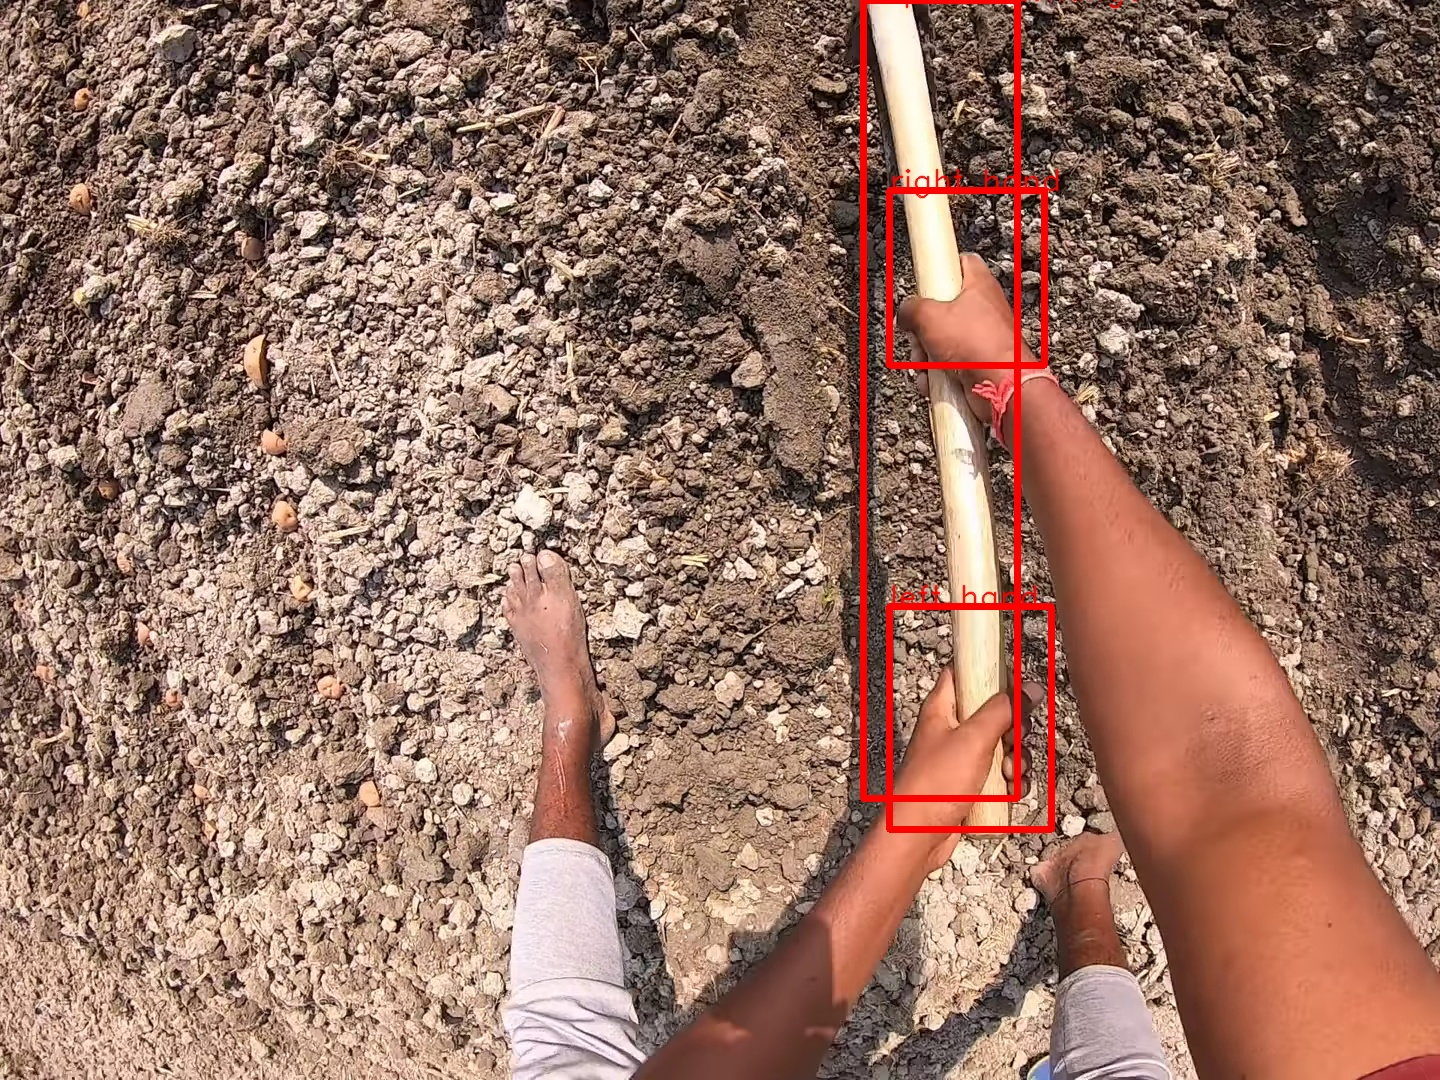

In [ ]:
# If this errors out, make sure you used the cli to download the video with this uid
video_path = os.path.join(CLI_OUTPUT_DIR, VERSION, 'full_scale', video_uid + '.mp4')
paths = visualize_bbox(video_path, bboxes)

Image(paths[1])

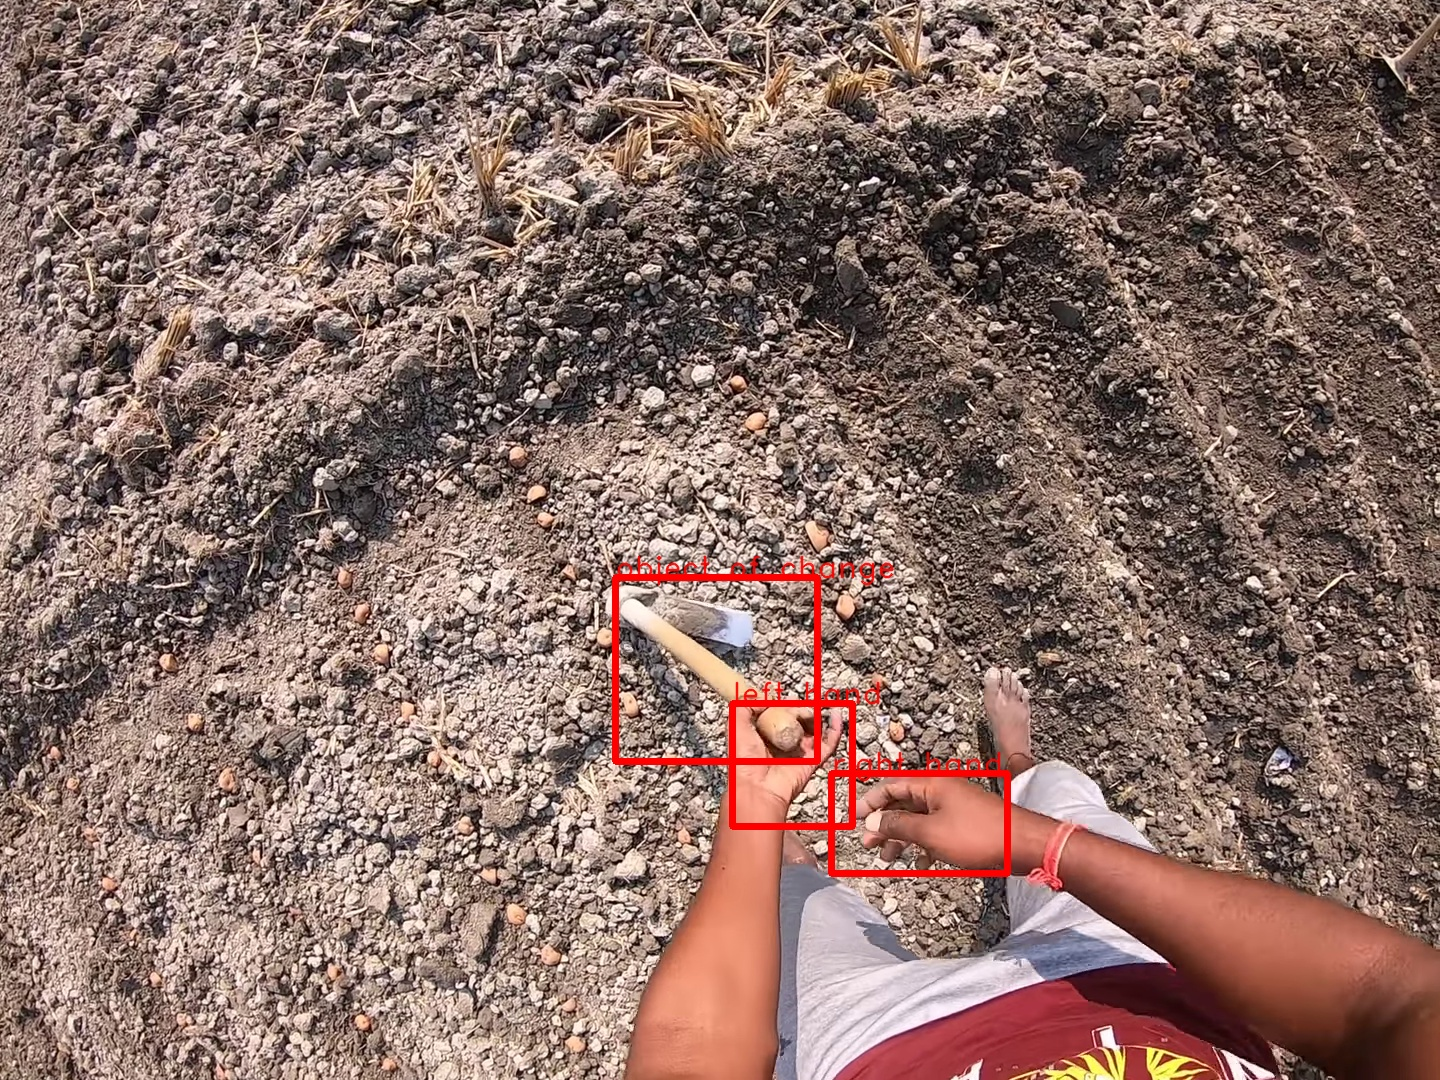

In [24]:
Image(random.sample(paths,1)[0])